## Homework 2: NBA Player Salaries 

**Objective**: Perform some basic data analysis techniques using pandas, numpy, seaborn, and matplotlib. Our goal is to complete data analysis on two csv files that contain NBA salaries and performance. Note that you might have to go online to look up some pandas concepts.

**General Note**: You may need to convert values from strings to integers/float, then back to strings.

**Questions**: 

0.) You have two csv files, "players.csv" and "salaries_1985to2018.csv". Read in both as two different dataframes. Merge them based on player name (hint: you have to rename one of the columns). We will be using this dataframe for the following questions. 

1.) Make a line plot of the average salaries by season. Are they increasing over time?

2.) Make a line plot of the average weight by season. Is weight increasing over time?

3.) Compute the average salary for each draft pick round. Are there any trends? 

4.) Take your merged dataframe. Divide the players heights into 2 inch buckets, starting at 6'0. So 6'0 - 6'2, 6'2 - 6'4. Plot a histogram of the buckets. What does the average salary look like per bucket? Heights are stored as a string. This might result in weird behavior when sorting. You may need to convert to inches as an integer, then convert back to strings when plotting. Optional helper function is given below.

5.) Group by player_id and make a scatter plot of the average career FG% vs e_FG%. Notice anything weird? You may need to convert strings to float values.

6.) Group by player_id again, and make a scatter plot of average career FG% vs career FT%. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Question 4 helper function 
# helper function to convert feet-inches strings to inches
def feet_inches_to_inches(height_str):
    feet, inches = map(int, height_str.split('-'))
    return feet * 12 + inches


Question 0 Solution:

In [3]:
players = pd.read_csv('players.csv')
salaries = pd.read_csv('salaries_1985to2018.csv')
print(players.columns)
print(salaries.columns)

Index(['index', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight'],
      dtype='object')
Index(['index', 'league', 'player_id', 'salary', 'season', 'season_end',
       'season_start', 'team'],
      dtype='object')


In [4]:
players.head()

,index,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [5]:
salaries.head()

,index,league,player_id,salary,season,season_end,season_start,team
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [6]:
df = pd.merge(players, salaries, left_on='_id', right_on='player_id', how='inner')
df.head()

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,shoots,weight,index_y,league,player_id,salary,season,season_end,season_start,team
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,Right,240lb,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14163 entries, 0 to 14162
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index_x       14163 non-null  int64  
 1   _id           14163 non-null  object 
 2   birthDate     14163 non-null  object 
 3   birthPlace    14163 non-null  object 
 4   career_AST    14163 non-null  float64
 5   career_FG%    14163 non-null  object 
 6   career_FG3%   14163 non-null  object 
 7   career_FT%    14163 non-null  object 
 8   career_G      14163 non-null  int64  
 9   career_PER    14163 non-null  object 
 10  career_PTS    14163 non-null  float64
 11  career_TRB    14163 non-null  object 
 12  career_WS     14163 non-null  object 
 13  career_eFG%   14163 non-null  object 
 14  college       12527 non-null  object 
 15  draft_pick    12261 non-null  object 
 16  draft_round   12261 non-null  object 
 17  draft_team    12261 non-null  object 
 18  draft_year    12261 non-nu

Question 1 Solution:

In [8]:
print(df.columns)
mean_salary = df.groupby('season')['salary'].mean().reset_index()

Index(['index_x', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'index_y', 'league',
       'player_id', 'salary', 'season', 'season_end', 'season_start', 'team'],
      dtype='object')


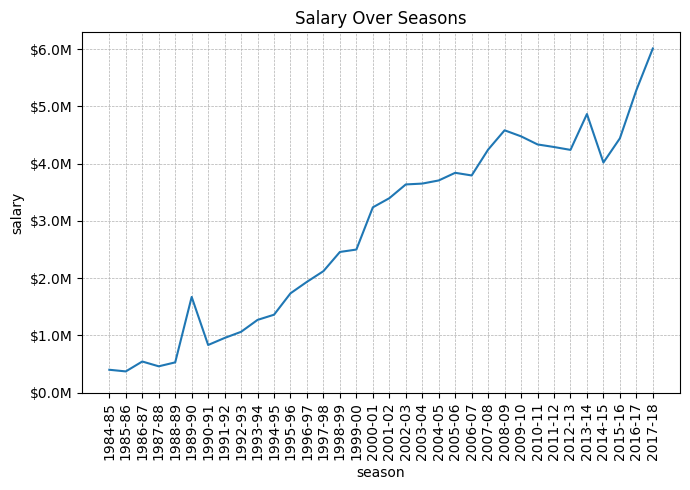

In [9]:
y_values_in_millions = mean_salary.salary / 1e6
y_ticks = list(range(0, int(y_values_in_millions.max()) + 1, 1))
y_tick_labels = [f"${value:.1f}M" for value in y_ticks]

plt.figure(figsize=(7, 5))
plt.plot(mean_salary.season, y_values_in_millions)
plt.title('Salary Over Seasons')
plt.xlabel('season')
plt.ylabel('salary')
plt.yticks(y_ticks, y_tick_labels)
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show();

They are increasing over time.

Question 2 Solution:

In [10]:
print(df.columns)
df['weight'] = df['weight'].str.replace('lb', '').astype(int)

mean_weight = df.groupby('season')['weight'].mean().reset_index()

Index(['index_x', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'index_y', 'league',
       'player_id', 'salary', 'season', 'season_end', 'season_start', 'team'],
      dtype='object')


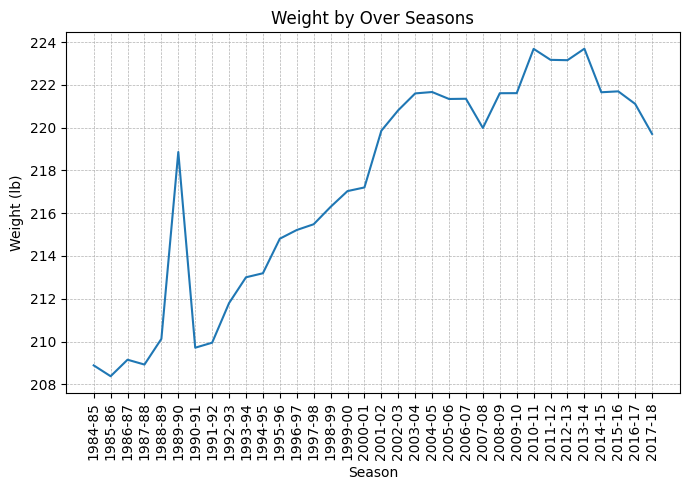

In [11]:
plt.figure(figsize=(7, 5))
sns.lineplot(x=mean_weight.season, y=mean_weight.weight)
plt.title('Weight by Over Seasons')
plt.xlabel('Season')
plt.ylabel('Weight (lb)')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show();

The average weight of NBA players has generally increased over time, especially from the early 1990s to the mid-2000s. 

However, after the mid-2000s, the weight seems to stabilize with slight fluctuations.

Question 3 Solution

In [12]:
df['draft_round'].unique()

array(['1st round', '2nd round', '3rd round', nan, '7th round',
       '4th round', '5th round', '9th round', '8th round', '6th round',
       '10th round'], dtype=object)

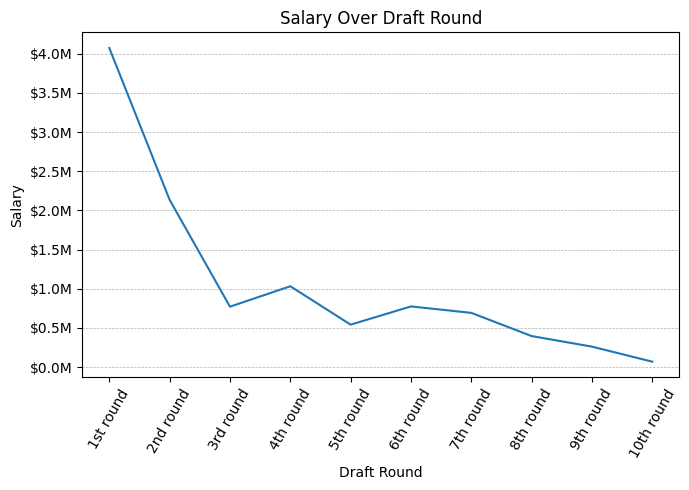

In [13]:

avg_salary_by_round = df.groupby('draft_round')['salary'].mean()
sorted_draft_rounds = sorted(avg_salary_by_round.index, key=lambda x: int(x.split(" ")[0].replace("st", "").replace("nd", "").replace("rd", "").replace("th", "")))


sorted_values = avg_salary_by_round[sorted_draft_rounds].values / 1e6


y_ticks_q3 = [x * 0.5 for x in range(0, int(2 * sorted_values.max()) + 1)]
y_tick_labels_q3 = [f"${value:.1f}M" for value in y_ticks_q3]


plt.figure(figsize=(7, 5))
sns.lineplot(x=sorted_draft_rounds, y=sorted_values)
plt.title('Salary Over Draft Round')
plt.xlabel('Draft Round')
plt.ylabel('Salary')
plt.yticks(y_ticks_q3, y_tick_labels_q3)
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


High pick drafts get paid more.

Question 4 Solutions: 

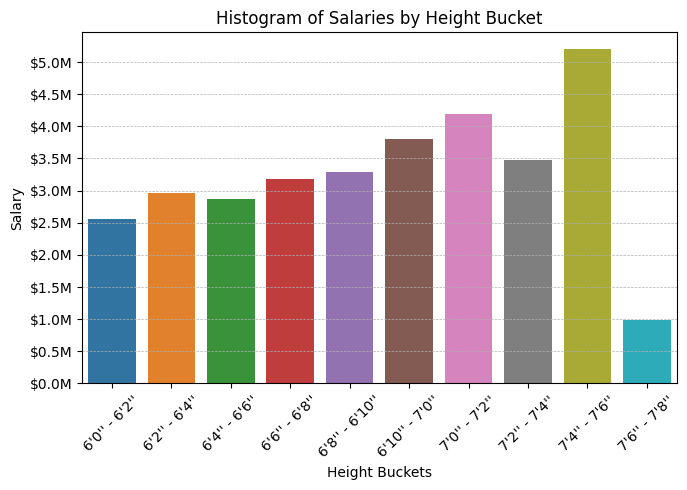

In [14]:
df['height_in_inches'] = df['height'].map(feet_inches_to_inches)
temp_df = df[df['height_in_inches'] >= 72]
bins = list(range(72, temp_df['height_in_inches'].max() + 2, 2))
labels = [f"{i//12}'{i%12}'' - {(i+2)//12}'{(i+2)%12}''" for i in bins[:-1]]

temp_df['height_bucket'] = pd.cut(temp_df['height_in_inches'], bins=bins, labels=labels, include_lowest=True)

avg_salary_by_height = temp_df.groupby('height_bucket')['salary'].mean()

y_values_height = avg_salary_by_height.values / 1e6
y_ticks_height = [x * 0.5 for x in range(0, int(2 * y_values_height.max()) + 1)]
y_tick_labels_height = [f"${value:.1f}M" for value in y_ticks_height]


plt.figure(figsize=(7, 5))

sns.barplot(x=avg_salary_by_height.index, y=y_values_height)
plt.title('Histogram of Salaries by Height Bucket')
plt.xlabel('Height Buckets')
plt.ylabel('Salary')
plt.yticks(y_ticks_height, y_tick_labels_height)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As the height increases, the salary also increases. But players extremely tall (7'6'' - 7'8'') have very low salaries.

Question 5 Solution

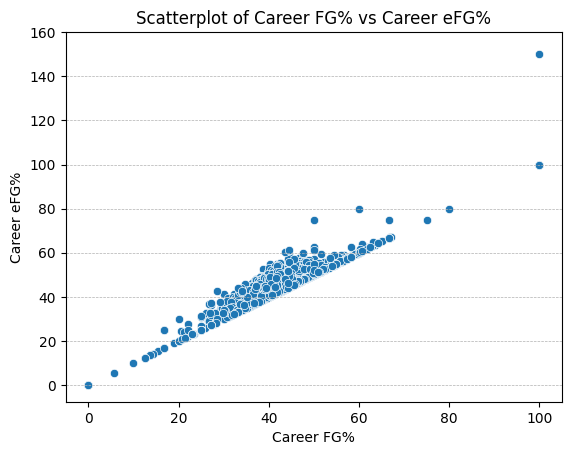

In [15]:
df['career_FG%'] = pd.to_numeric(df['career_FG%'],errors='coerce')
df['career_eFG%'] = pd.to_numeric(df['career_eFG%'],errors='coerce')


scatter_df_q5 = df.groupby('player_id')[['career_FG%', 'career_eFG%']].mean().reset_index()
sns.scatterplot(x='career_FG%', y='career_eFG%', data=scatter_df_q5)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.title('Scatterplot of Career FG% vs Career eFG%')
plt.xlabel('Career FG%')
plt.ylabel('Career eFG%')
plt.yticks(np.arange(0, 180, 20));

Question 6 Solution

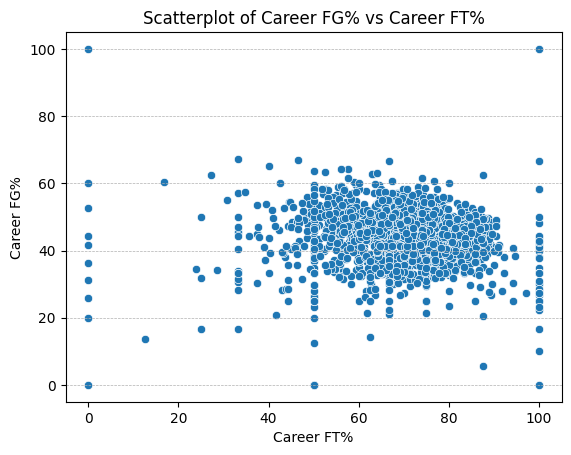

In [16]:
df['career_FT%'] = pd.to_numeric(df['career_FT%'],errors='coerce')
scatter_df_q6 = df.groupby('player_id')[['career_FG%', 'career_FT%']].mean().reset_index()
sns.scatterplot(x='career_FT%', y='career_FG%', data=scatter_df_q6)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.title('Scatterplot of Career FG% vs Career FT%')
plt.xlabel('Career FT%')
plt.ylabel('Career FG%');